# Notebook 2
Jose Castillo
## Setup

In [2]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # needed to register the 3D projection
from matplotlib import cm
np.set_printoptions(precision=4, suppress=True)



Note: you may need to restart the kernel to use updated packages.


In [8]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

## Dataset visualization

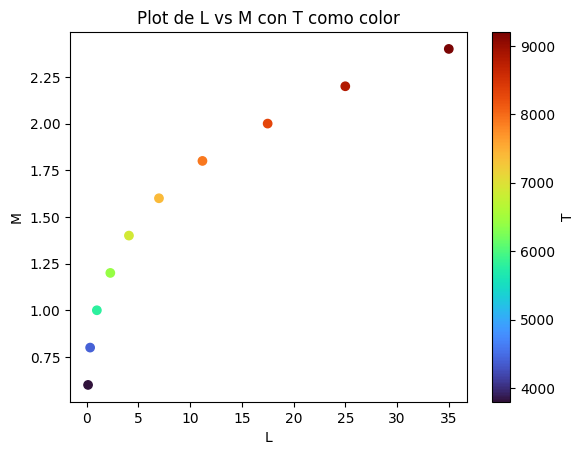

In [9]:
plt.scatter(L, M, c=T, cmap='turbo')
plt.colorbar(label='T')
plt.xlabel('L')
plt.ylabel('M')
plt.title('Plot de L vs M con T como color')
plt.show()

## Feature engineering

In [39]:
def build_X(M, T):
    return np.column_stack([
        M,
        T,
        M**2,
        M*T
    ])

X = build_X(M, T)

data = pd.DataFrame({
    "M": M,
    "T": T,
    "M^2": M**2,
    "M*T": M*T
})

data.head()

,M,T,M^2,M*T
0,0.6,3800,0.36,2280.0
1,0.8,4400,0.64,3520.0
2,1.0,5800,1.00,5800.0
3,1.2,6400,1.44,7680.0
4,1.4,6900,1.96,9660.0


## Loss and gradients (vectorized)

In [54]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    y_hat = X @ w + b
    error = y_hat - y
    cost = (error @ error) / (2 * m)
    return cost


n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0
print("Cost with w=0, b=0:", compute_cost(X, L, w_test, b_test))

Cost with w=0, b=0: 117.69675


In [55]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    y_hat = X @ w + b
    error = y_hat - y

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient(X, L, w_test, b_test)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)

Gradient at w=0, b=0:
dj_dw: [    -21.523   -87845.         -45.9434 -185408.8   ]
dj_db: -10.36


## Gradient descent + convergence

In [56]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iterations):
    w = w_init.copy()
    b = b_init
    history_it = []
    history_cost = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, y, w, b)
            history_it.append(i)
            history_cost.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w, b, history_it, history_cost

alpha = 1e-9
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: cost =  80.1334
Iteration  100: cost =  12.7700
Iteration  200: cost =   8.7026
Iteration  300: cost =   6.4979
Iteration  400: cost =   5.3029
Iteration  500: cost =   4.6552
Iteration  600: cost =   4.3041
Iteration  700: cost =   4.1138
Iteration  800: cost =   4.0107
Iteration  900: cost =   3.9548
Iteration  999: cost =   3.9247

Learned parameters:
w = [-0.     -0.0023  0.      0.0023]
b = -4.6279232134306034e-07


## Feature selection experiment

In [69]:
# M1
X1 = np.column_stack([M, T])

# M2
X2 = np.column_stack([M, T, M**2])

# M3
X3 = np.column_stack([M, T, M**2, M*T])

# M1

n = X1.shape[1]
w_test = np.zeros(n)
b_test = 0.0

temp_cost1 = compute_cost(X1, L, w_test, b_test)

dj_dw_test1, dj_db_test1 = compute_gradient(X1, L, w_test, b_test)

alpha = 1e-9
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0
w_learned1, b_learned1, it_hist1, cost_hist1 = gradient_descent(X1, L, w_init, b_init, alpha, num_iterations)

# M2

n = X2.shape[1]
w_test = np.zeros(n)
b_test = 0.0

temp_cost2 = compute_cost(X2, L, w_test, b_test)

dj_dw_test2, dj_db_test2 = compute_gradient(X2, L, w_test, b_test)

alpha = 1e-9
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0
w_learned2, b_learned2, it_hist2, cost_hist2 = gradient_descent(X2, L, w_init, b_init, alpha, num_iterations)

# M3

n = X3.shape[1]
w_test = np.zeros(n)
b_test = 0.0

temp_cost3 = compute_cost(X3, L, w_test, b_test)

dj_dw_test3, dj_db_test3 = compute_gradient(X3, L, w_test, b_test)

alpha = 1e-9
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0
w_learned3, b_learned3, it_hist3, cost_hist3 = gradient_descent(X3, L, w_init, b_init, alpha, num_iterations)




Iteration    0: cost = 110.1745
Iteration  100: cost =  41.1667
Iteration  200: cost =  41.1645
Iteration  300: cost =  41.1645
Iteration  400: cost =  41.1645
Iteration  500: cost =  41.1645
Iteration  600: cost =  41.1645
Iteration  700: cost =  41.1645
Iteration  800: cost =  41.1645
Iteration  900: cost =  41.1645
Iteration  999: cost =  41.1645
Iteration    0: cost = 110.1745
Iteration  100: cost =  41.1667
Iteration  200: cost =  41.1645
Iteration  300: cost =  41.1645
Iteration  400: cost =  41.1645
Iteration  500: cost =  41.1645
Iteration  600: cost =  41.1645
Iteration  700: cost =  41.1644
Iteration  800: cost =  41.1644
Iteration  900: cost =  41.1644
Iteration  999: cost =  41.1644
Iteration    0: cost =  80.1334
Iteration  100: cost =  12.7700
Iteration  200: cost =   8.7026
Iteration  300: cost =   6.4979
Iteration  400: cost =   5.3029
Iteration  500: cost =   4.6552
Iteration  600: cost =   4.3041
Iteration  700: cost =   4.1138
Iteration  800: cost =   4.0107
Iteratio

### Report

In [70]:
print("=== Model M1 ===")
print("w:", w_learned1)
print("b:", b_learned1)
print("final loss:", cost_hist1[-1])

print("\n=== Model M2 ===")
print("w:", w_learned2)
print("b:", b_learned2)
print("final loss:", cost_hist2[-1])

print("\n=== Model M3 ===")
print("w:", w_learned3)
print("b:", b_learned3)
print("final loss:", cost_hist3[-1])


=== Model M1 ===
w: [0.     0.0017]
b: -1.407264726800891e-06
final loss: 41.16452083411237

=== Model M2 ===
w: [0.     0.0017 0.    ]
b: -1.4072639681060424e-06
final loss: 41.16441286579003

=== Model M3 ===
w: [-0.     -0.0023  0.      0.0023]
b: -4.6279232134306034e-07
final loss: 3.9246671101516055


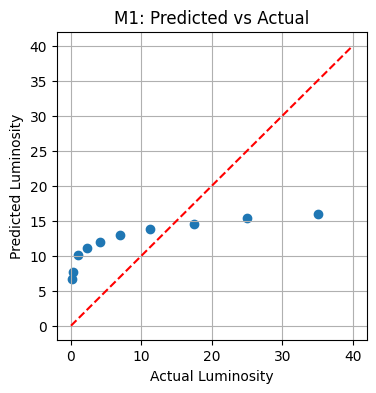

In [71]:
L_pred1 = X1 @ w_learned1 + b_learned1

plt.figure(figsize=(4,4))
plt.scatter(L, L_pred1)
plt.plot([0, 40], [0, 40], 'r--')
plt.xlabel("Actual Luminosity")
plt.ylabel("Predicted Luminosity")
plt.title("M1: Predicted vs Actual")
plt.grid(True)
plt.show()


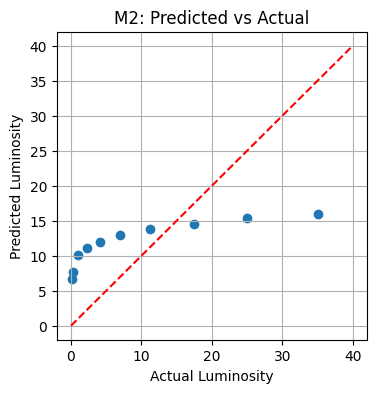

In [72]:
L_pred2 = X2 @ w_learned2 + b_learned2

plt.figure(figsize=(4,4))
plt.scatter(L, L_pred2)
plt.plot([0, 40], [0, 40], 'r--')
plt.xlabel("Actual Luminosity")
plt.ylabel("Predicted Luminosity")
plt.title("M2: Predicted vs Actual")
plt.grid(True)
plt.show()


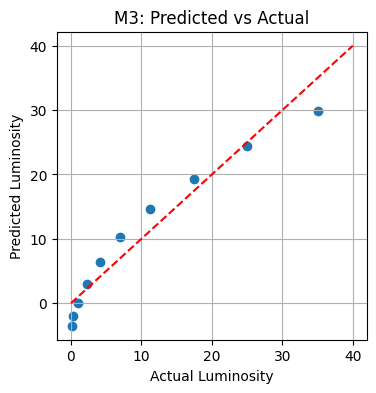

In [73]:
L_pred3 = X3 @ w_learned3 + b_learned3

plt.figure(figsize=(4,4))
plt.scatter(L, L_pred3)
plt.plot([0, 40], [0, 40], 'r--')
plt.xlabel("Actual Luminosity")
plt.ylabel("Predicted Luminosity")
plt.title("M3: Predicted vs Actual")
plt.grid(True)
plt.show()


## Cost vs iteraction

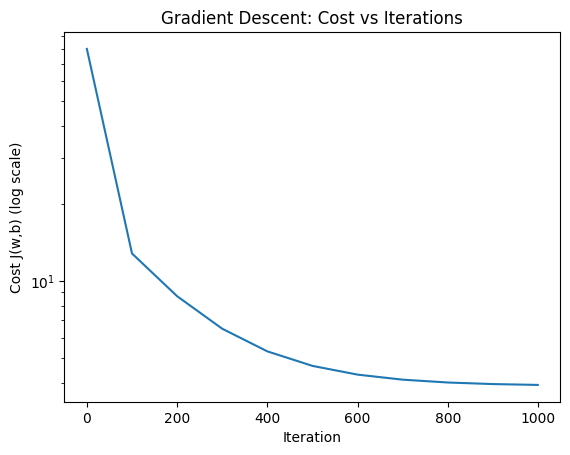

In [ ]:
plt.figure()
plt.semilogy(it_hist, cost_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b) (log scale)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()


Iteration    0: cost = 113.5327
Iteration  100: cost =  20.5753
Iteration  200: cost =  18.4829
Iteration  300: cost =  17.6030
Iteration  400: cost =  16.7892
Iteration  500: cost =  16.0238
Iteration  600: cost =  15.3039
Iteration  700: cost =  14.6267
Iteration  800: cost =  13.9896
Iteration  900: cost =  13.3904
Iteration  999: cost =  12.8321


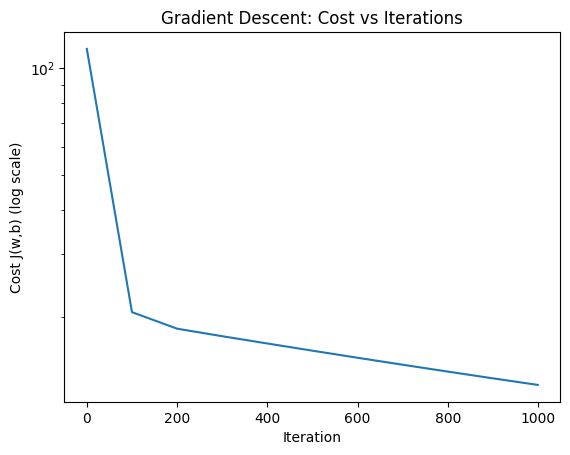

In [78]:
n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0

temp_cost = compute_cost(X, L, w_test, b_test)

dj_dw_test, dj_db_test = compute_gradient(X, L, w_test, b_test)

alpha = 1e-10
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0
w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, L, w_init, b_init, alpha, num_iterations)

plt.figure()
plt.semilogy(it_hist, cost_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b) (log scale)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

Iteration    0: cost = 117.2763
Iteration  100: cost =  83.1868
Iteration  200: cost =  61.0197
Iteration  300: cost =  46.5933
Iteration  400: cost =  37.1929
Iteration  500: cost =  31.0557
Iteration  600: cost =  27.0374
Iteration  700: cost =  24.3949
Iteration  800: cost =  22.6459
Iteration  900: cost =  21.4771
Iteration  999: cost =  20.6919


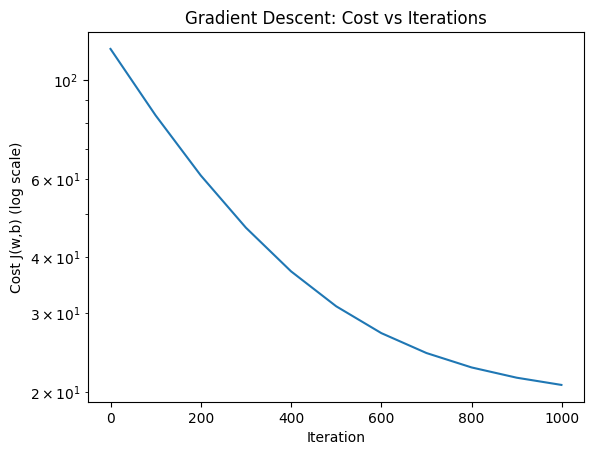

In [87]:
n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0

temp_cost = compute_cost(X, L, w_test, b_test)

dj_dw_test, dj_db_test = compute_gradient(X, L, w_test, b_test)

alpha = 1e-11
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0
w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, L, w_init, b_init, alpha, num_iterations)

plt.figure()
plt.semilogy(it_hist, cost_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b) (log scale)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

We can see that if alpha is less than or equal to 1e-8 it diverges, then we see that it starts to be a right angle when it goes from 1e-9 to 1e-10, but at 1e-11 this trend is lost

## Inference demo

In [89]:
M_new = 1.3
T_new = 6600

X_new = np.array([M_new, T_new, M_new**2, M_new*T_new])

L_pred = X_new @ w_learned + b_learned
print("Predicted luminosity:", L_pred)

Predicted luminosity: 8.798351793839673


## Convergence Analysis

The cost decreases steadily over the iterations and reaches a final value of approximately 8.8, indicating that the gradient descent algorithm converges successfully. The smooth and monotonic behavior of the cost function suggests stable training without oscillations or divergence. After a sufficient number of iterations, the cost stabilizes, showing that the model has reached a minimum of the loss function.
